<a href="https://colab.research.google.com/github/arunkumarmtp17/NIH-chest-x-ray-classification-using-cnn/blob/main/deep_learning_project_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

{"username":"arunkumarmtp17","key":"e87888455b71a932f6a94cb8715f992f"}

In [ ]:
od.download("https://www.kaggle.com/datasets/nih-chest-xrays/sample")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunkumarmtp17
Your Kaggle Key: ··········


100%|██████████| 4.20G/4.20G [00:47<00:00, 95.7MB/s]


In [ ]:
!pip install split-folders[full]
import pandas as pd
import shutil
import os
import splitfolders


In [ ]:
df=pd.read_csv("/content/sample/sample_labels.csv")
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5602,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,061Y,F,AP,3056,2544,0.139000,0.139000
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


In [ ]:
df = df[~df['Finding Labels'].str.contains('\|')]

In [ ]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139000,0.139000
7,00000057_001.png,No Finding,1,57,071Y,M,AP,3056,2544,0.139000,0.139000
8,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143000,0.143000
...,...,...,...,...,...,...,...,...,...,...,...
5600,00030704_000.png,No Finding,0,30704,052Y,F,PA,2021,2021,0.194311,0.194311
5601,00030712_000.png,No Finding,0,30712,058Y,M,PA,2021,2021,0.194311,0.194311
5603,00030789_000.png,Infiltration,0,30789,052Y,F,PA,2021,2021,0.194311,0.194311
5604,00030792_000.png,No Finding,0,30792,010Y,F,PA,1775,1712,0.194311,0.194311


In [ ]:
df=df[["Image Index","Finding Labels"]]
df

,Image Index,Finding Labels
2,00000017_001.png,No Finding
3,00000030_001.png,Atelectasis
6,00000042_002.png,No Finding
7,00000057_001.png,No Finding
8,00000061_002.png,Effusion
...,...,...
5600,00030704_000.png,No Finding
5601,00030712_000.png,No Finding
5603,00030789_000.png,Infiltration
5604,00030792_000.png,No Finding


In [ ]:
df["Finding Labels"].value_counts()

No Finding            3044
Infiltration           503
Effusion               203
Atelectasis            192
Nodule                 144
Pneumothorax           114
Mass                    99
Consolidation           72
Pleural_Thickening      65
Cardiomegaly            50
Emphysema               42
Edema                   41
Fibrosis                38
Pneumonia               14
Hernia                   5
Name: Finding Labels, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 2 to 5605
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Image Index     4626 non-null   object
 1   Finding Labels  4626 non-null   object
dtypes: object(2)
memory usage: 108.4+ KB


In [ ]:
df["Finding Labels"].nunique

<bound method IndexOpsMixin.nunique of 2         No Finding
3        Atelectasis
6         No Finding
7         No Finding
8           Effusion
            ...     
5600      No Finding
5601      No Finding
5603    Infiltration
5604      No Finding
5605      No Finding
Name: Finding Labels, Length: 4626, dtype: object>

In [ ]:
import os

In [ ]:
import os

# Define the path to the folder containing your images
image_folder_path = '/content/sample/sample/images'

# Create a list of file paths for all images using the 'filename' column in your DataFrame
image_paths = [os.path.join(image_folder_path, filename) for filename in df['Image Index']]

# Now, image_paths contains the full file paths to your images based on the 'filename' column in your DataFrame


In [ ]:
df

,Image Index,Finding Labels
2,00000017_001.png,No Finding
3,00000030_001.png,Atelectasis
6,00000042_002.png,No Finding
7,00000057_001.png,No Finding
8,00000061_002.png,Effusion
...,...,...
5600,00030704_000.png,No Finding
5601,00030712_000.png,No Finding
5603,00030789_000.png,Infiltration
5604,00030792_000.png,No Finding


In [ ]:
df['path'] = image_paths


<ipython-input-15-605da200bb3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['path'] = image_paths


In [ ]:
df

,Image Index,Finding Labels,path
2,00000017_001.png,No Finding,/content/sample/sample/images/00000017_001.png
3,00000030_001.png,Atelectasis,/content/sample/sample/images/00000030_001.png
6,00000042_002.png,No Finding,/content/sample/sample/images/00000042_002.png
7,00000057_001.png,No Finding,/content/sample/sample/images/00000057_001.png
8,00000061_002.png,Effusion,/content/sample/sample/images/00000061_002.png
...,...,...,...
5600,00030704_000.png,No Finding,/content/sample/sample/images/00030704_000.png
5601,00030712_000.png,No Finding,/content/sample/sample/images/00030712_000.png
5603,00030789_000.png,Infiltration,/content/sample/sample/images/00030789_000.png
5604,00030792_000.png,No Finding,/content/sample/sample/images/00030792_000.png


In [ ]:
destination_dir = '/content/sample/sample/split_image'

# Create directories for each unique label in the "Finding Labels" column
labels = df['Finding Labels'].unique()
for label in labels:
    os.makedirs(os.path.join(destination_dir, str(label)), exist_ok=True)

# Iterate through the dataset and move images to their respective label directories
for index, row in df.iterrows():
    image_path = row['path']
    label = row['Finding Labels']
    destination_path = os.path.join(destination_dir, str(label), os.path.basename(image_path))

    # Move the image to its corresponding label directory
    shutil.move(image_path, destination_path)

print("Images have been split and organized into label directories based on 'Finding Labels'.")

Images have been split and organized into label directories based on 'Finding Labels'.


In [ ]:
pip install Augmentor


In [ ]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your base directory where images are organized by class
base_dir = '/content/sample/sample/main'

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Iterate through the class directories
for class_folder in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_folder)
    class_images = os.listdir(class_dir)

    # Check if the class has fewer than 100 images
    if len(class_images) < 100:
        # Apply image augmentation to this class
        for image_file in class_images:
            image_path = os.path.join(class_dir, image_file)
            img = Image.open(image_path)
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)

            # Generate augmented images and save them in the same directory
            i = 0
            while len(class_images) < 150:  # Keep generating until there are 150 images
                for batch in datagen.flow(img, batch_size=1):
                    augmented_image = image.array_to_img(batch[0])
                    augmented_image.save(os.path.join(class_dir, f'augmented_{i}_{image_file}'))
                    i += 1
                    class_images.append(f'augmented_{i}_{image_file}')

                    # Stop after generating 10 augmented images for each original image
                    if i >= 10:
                        break


In [ ]:
import os

# Define the base directory where classes are represented as subdirectories
base_dir = '/content/sample/sample/main'

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Iterate through the class directories
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Count the number of files (images) in the class directory
        file_count = len(os.listdir(class_path))
        class_counts[class_name] = file_count

# Print the counts for each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")


Class 'Pleural_Thickening' has 150 images.
Class 'Edema' has 150 images.
Class 'Infiltration' has 503 images.
Class 'Pneumonia' has 150 images.
Class 'Mass' has 150 images.
Class 'Nodule' has 144 images.
Class 'Cardiomegaly' has 150 images.
Class 'Pneumothorax' has 114 images.
Class 'Fibrosis' has 150 images.
Class 'Consolidation' has 150 images.
Class 'Effusion' has 203 images.
Class 'Atelectasis' has 192 images.
Class 'No Finding' has 3044 images.
Class 'Hernia' has 150 images.
Class 'Emphysema' has 150 images.


In [ ]:
'''import shutil
shutil.make_archive("/content/sample/sample/main", 'zip', '/content/sample/sample/main')'''


'/content/sample/sample/main.zip'

In [ ]:
'''from google.colab import files
files.download('/content/sample/sample/main.zip')'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
splitfolders.ratio("/content/sample/sample/main", output="/content/sample/sample/finalsplit",
seed=1337, ratio=(.8,.2), group_prefix=None, move=False)

Copying files: 5550 files [00:30, 183.97 files/s]


In [ ]:

import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import PIL.ImageOps as ImageOps
import pandas as pd
import PIL.Image as Image
from tqdm import tqdm
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

class_names = [
    'No Finding', 'Infiltration', 'Effusion', 'Atelectasis', 'Nodule', 'Pneumothorax',
    'Mass', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly', 'Emphysema',
    'Edema', 'Fibrosis', 'Pneumonia', 'Hernia'
]

class_names_label = {class_name: i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

def pre_process(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    return image

def load_data():
    datasets = ["/content/sample/sample/finalsplit/train", "/content/sample/sample/finalsplit/val"]
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label.get(folder)

            if label is not None:
                # Iterate through each image in our folder
                for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the image
                    image = pre_process(img_path)
                    images.append(image)
                    labels.append(label)

        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')

        output.append((images, labels))

    return output

(train_images, train_labels), (test_images, test_labels) = load_data()


Loading /content/sample/sample/finalsplit/train


100%|██████████| 120/120 [00:02<00:00, 44.12it/s]


Loading /content/sample/sample/finalsplit/val


100%|██████████| 30/30 [00:00<00:00, 55.59it/s]


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4438
Number of testing examples: 1112
Each image is of size: (150, 150)


In [ ]:

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(15,15))
    fig.suptitle("EXAMPLES OF IMAGES FROM THE DATASET", fontsize=16)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]],fontsize=10)
    plt.show()


In [ ]:
def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

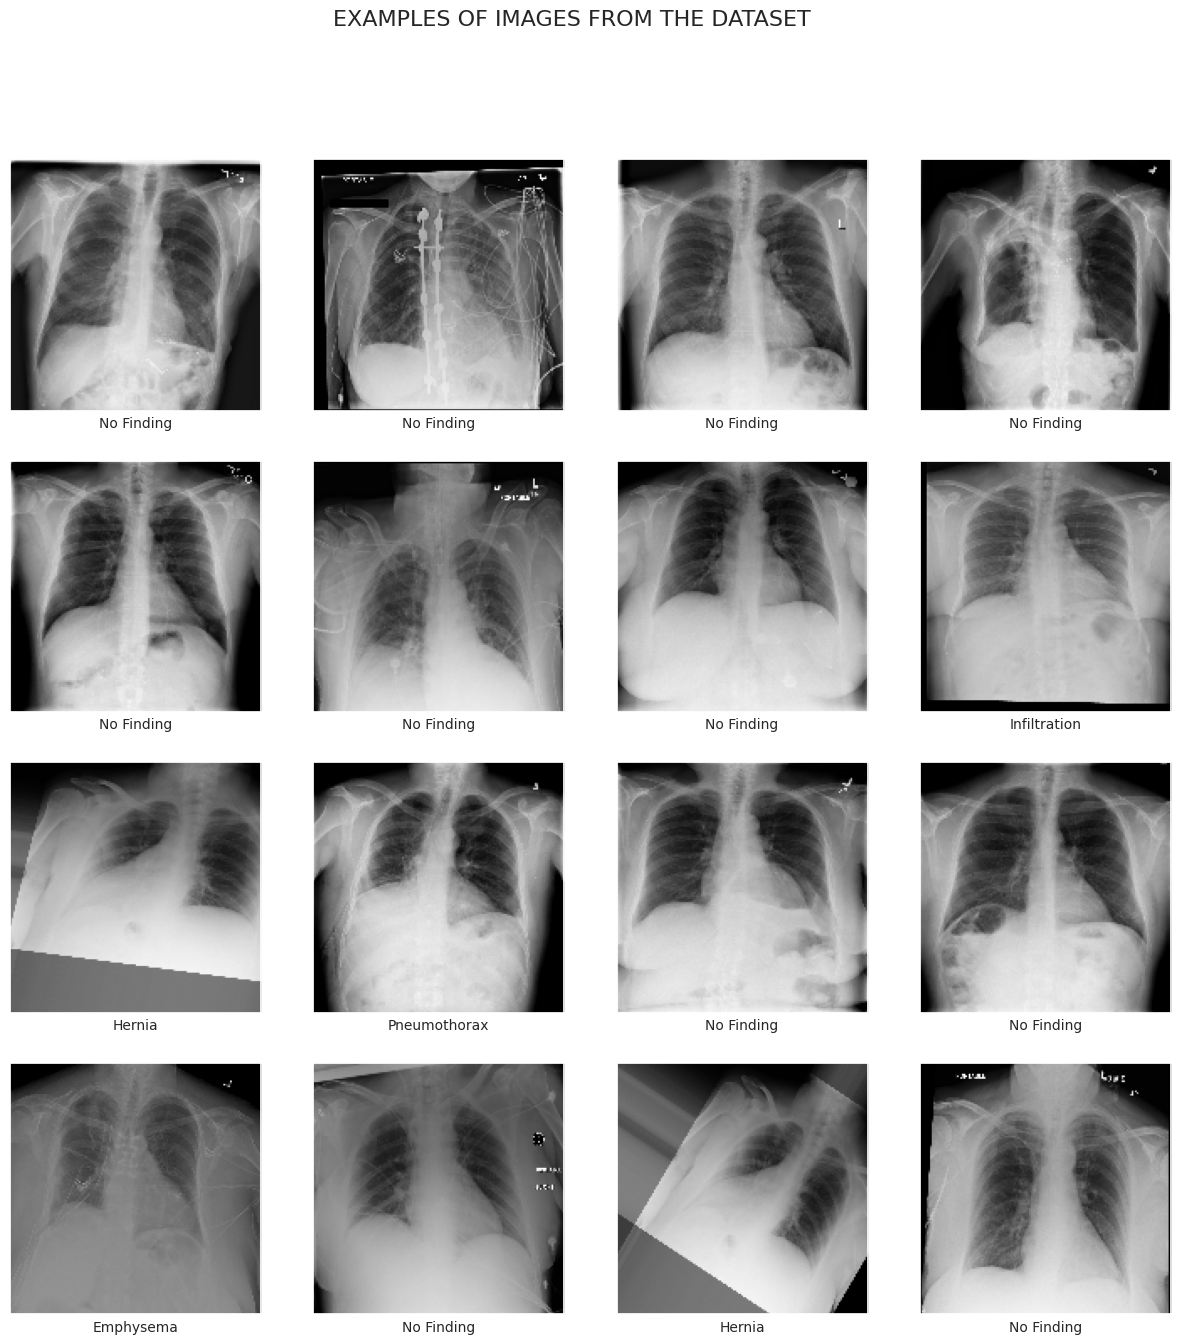

In [ ]:
display_examples(class_names, train_images, train_labels)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
28/28 [==============================] - 109s 4s/step - loss: 1.8452 - accuracy: 0.5304 - val_loss: 1.6684 - val_accuracy: 0.5586
Epoch 2/10
28/28 [==============================] - 88s 3s/step - loss: 1.5689 - accuracy: 0.5899 - val_loss: 1.5971 - val_accuracy: 0.5980
Epoch 3/10
28/28 [==============================] - 83s 3s/step - loss: 1.4421 - accuracy: 0.6231 - val_loss: 1.5642 - val_accuracy: 0.5980
Epoch 4/10
28/28 [==============================] - 90s 3s/step - loss: 1.3040 - accuracy: 0.6504 - val_loss: 1.5013 - val_accuracy: 0.6149
Epoch 5/10
28/28 [==============================] - 89s 3s/step - loss: 1.1993 - accuracy: 0.6676 - val_loss: 1.5680 - val_accuracy: 0.6137
Epoch 6/10
28/28 [==============================] - 89s 3s/step - loss: 1.0812 - accuracy: 0.6941 - val_loss: 1.6185 - val_accuracy: 0.6227
Epoch 7/10
28/28 [==============================] - 95s 3s/step - loss: 0.9423 - accuracy: 0.7276 - val_loss: 1.6752 - val_accuracy: 0.6137
Epoch 8/10
28/28 [=

In [ ]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()


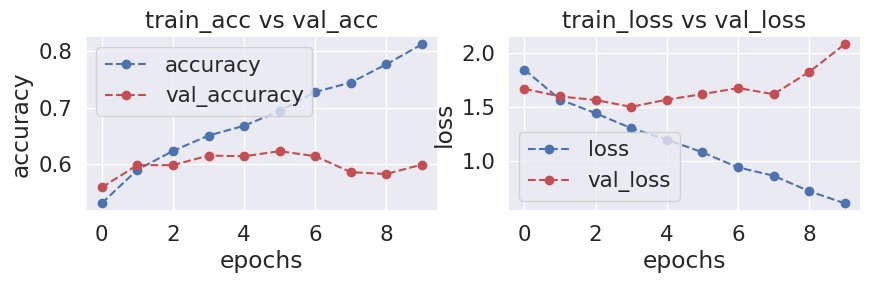

In [ ]:
plot_accuracy_loss(history)

In [ ]:
train_accuracy = history.history['accuracy'][9]
val_accuracy = history.history['val_accuracy'][9]
train_accuracy

0.8121126890182495

In [ ]:
val_accuracy

0.5990990996360779

In [ ]:

test_loss = model.evaluate(test_images, test_labels)

35/35 [==============================] - 9s 253ms/step - loss: 2.0339 - accuracy: 0.6061
